# Comparison front and back

In [85]:
import pandas as pd
import os
import numpy as np

In [86]:
# import the rtc and abs data

rtc_data = pd.read_csv("../measurements/250522/results/01_merged_reflectance_rtc/rtc_merged_refl_back.csv")

rtc_data["back_refl_rtc_mean"] = rtc_data["mean_intensity_corr"]
rtc_data["back_refl_rtc_median"] = rtc_data["median_intensity_corr"]

abs_data = pd.read_csv("../measurements/250522/results/00_processed_abs/abs_x_max_back.csv")
abs_data["back_refl_abs"] = abs_data["x_max"]

front = pd.read_csv("../measurements/250522/results/02_merged_reflectance_weight/M1_front_merged.csv")
front = front.rename(columns={col: f"front_{col}" for col in front.columns if col not in ["leaf_kind", "mes1", "mes2", "mes3", "distance", "measurement"]})

In [87]:
# create matching leaf_kind column
rtc_data["leaf_kind"] = rtc_data["filename"].apply(
    lambda x: '_'.join(os.path.basename(x).split('_')[4:6]).replace('.las', '').lower().replace("_ir", ""))

abs_data["leaf_kind"] = abs_data["basename"].apply(
    lambda x: '_'.join(os.path.basename(x).split('_')[2:4]).replace('.las', '').lower().replace("_ir", ""))


In [88]:
leaf_kind_mapping = {
    "linde_links": "linde2",
    "linde_rechts": "linde1",
    "ahorn-gross": "ahorn_gross",
    "ahorn-klein": "ahorn_klein"
}

abs_data["leaf_kind"] = abs_data["leaf_kind"].replace(leaf_kind_mapping)

front["leaf_kind"] = front["leaf_kind"].replace(leaf_kind_mapping)

#merge back data
merged_back = pd.merge(rtc_data, abs_data, on="leaf_kind",how="left")

# add the ratios back_refl_rtc_mean
merged_back["back_rtc/abs_mean"] = merged_back["back_refl_rtc_mean"] / merged_back["back_refl_abs"]
merged_back["back_abs/rtc_mean"] = merged_back["back_refl_abs"] / merged_back["back_refl_rtc_mean"]

# Calculate the ratios for median-values
merged_back["back_rtc/abs_median"] = merged_back["back_refl_rtc_median"] / merged_back["back_refl_abs"]
merged_back["back_abs/rtc_median"] = merged_back["back_refl_abs"] / merged_back["back_refl_rtc_median"]




merged = pd.merge(merged_back, front, on="leaf_kind", how="left")
merged.columns

Index(['filename', 'measurement_x', 'distance_x', 'mean_intensity_corr',
       'median_intensity_corr', 'back_refl_rtc_mean', 'back_refl_rtc_median',
       'leaf_kind', 'basename', 'distance_y', 'x_max', 'back_refl_abs',
       'back_rtc/abs_mean', 'back_abs/rtc_mean', 'back_rtc/abs_median',
       'back_abs/rtc_median', 'front_Unnamed: 0', 'front_filename',
       'measurement_y', 'distance', 'front_mean_intensity_corr',
       'front_median_intensity_corr', 'mes1', 'mes2', 'mes3', 'front_wc',
       'front_basename', 'front_abs_refl', 'front_rtc/abs_mean',
       'front_abs/rtc_mean', 'front_rtc/abs_median', 'front_abs/rtc_median'],
      dtype='object')

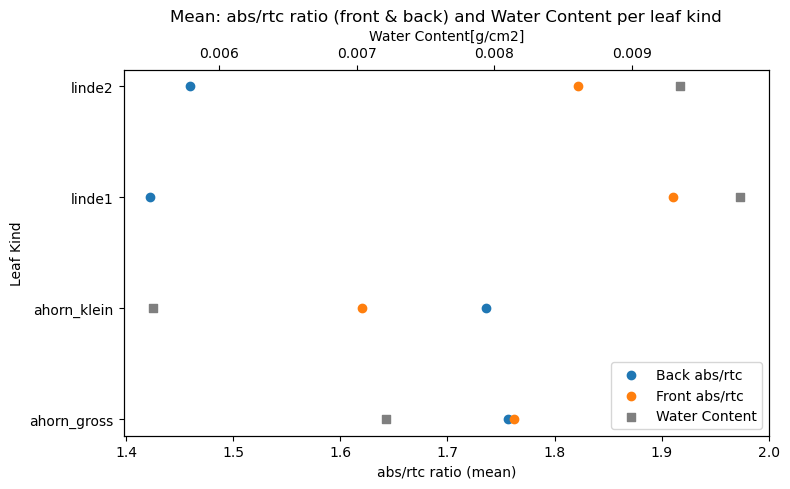

In [119]:
import matplotlib.pyplot as plt

# Just for mes1
mes = 'mes1'

# Only consider mean columns, no aggregation
grouped = merged[['leaf_kind', 'back_abs/rtc_mean', 'front_abs/rtc_mean', "mes1"]]

y = range(len(grouped))
fig, ax1 = plt.subplots(figsize=(8, 5))

color_back = 'tab:blue'
color_front = 'tab:orange'
color_wc = 'tab:grey'

# Plot abs/rtc ratios for back and front per leaf kind, with y as leaf_kind
ax1.set_ylabel('Leaf Kind')
ax1.set_xlabel('abs/rtc ratio (mean)', color="black")
sc1 = ax1.scatter(grouped['back_abs/rtc_mean'], y, marker='o', color=color_back, label='Back abs/rtc')
sc2 = ax1.scatter(grouped['front_abs/rtc_mean'], y, marker='o', color=color_front, label='Front abs/rtc')
ax1.tick_params(axis='x', labelcolor='black')  # x1 ticks in black
ax1.set_yticks(y)
ax1.set_yticklabels(grouped['leaf_kind'])
ax1.set_xlim(right=2.0)  # Set x1 (bottom x-axis) max to 2.2

# Create a second x-axis for water content
ax2 = ax1.twiny()
ax2.set_xlabel('Water Content[g/cm2]', color="black")
sc3 = ax2.scatter(grouped['mes1'], y, marker='s', color=color_wc, label='Water Content')
ax2.tick_params(axis='x', labelcolor="black")

# Combine all handles and labels for a single legend
handles = [sc1, sc2, sc3]
labels = ['Back abs/rtc', 'Front abs/rtc', 'Water Content']
ax1.legend(handles, labels, loc='lower right')

plt.title('Mean: abs/rtc ratio (front & back) and Water Content per leaf kind')
plt.tight_layout()
plt.show()


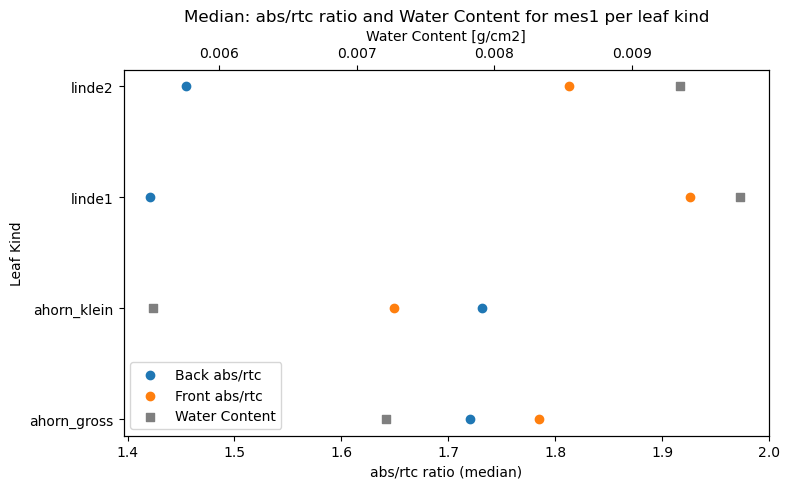

In [115]:
import matplotlib.pyplot as plt

# Just for mes1
mes = 'mes1'

# Group by leaf_kind and calculate median ratios for back, front, and water content for mes1 only
median_columns = ['back_abs/rtc_median', 'front_abs/rtc_median', 'front_wc', 'leaf_kind']
grouped = merged[median_columns]

y = range(len(grouped))
fig, ax1 = plt.subplots(figsize=(8, 5))

color_back = 'tab:blue'
color_front = 'tab:orange'
color_wc = 'tab:grey'

# Plot abs/rtc ratios for back and front per leaf kind, with y as leaf_kind
ax1.set_ylabel('Leaf Kind')
ax1.set_xlabel('abs/rtc ratio (median)', color="black")
sc1 = ax1.scatter(grouped['back_abs/rtc_median'], y, marker='o', color=color_back, label='Back abs/rtc (median)')
sc2 = ax1.scatter(grouped['front_abs/rtc_median'], y, marker='o', color=color_front, label='Front abs/rtc (median)')
ax1.tick_params(axis='x', labelcolor="black")
ax1.set_yticks(y)
ax1.set_yticklabels(grouped['leaf_kind'])
ax1.set_xlim(right=2.0)  # Set x1 (bottom x-axis) max to 2.2


# Create a second x-axis for water content
ax2 = ax1.twiny()
ax2.set_xlabel('Water Content [g/cm2]', color="black")
sc3 = ax2.scatter(grouped['front_wc'], y, marker='s', color=color_wc, label='Water Content (median)')
ax2.tick_params(axis='x', labelcolor="black")

# Combine all handles and labels for a single legend
handles = [sc1, sc2, sc3]
labels = ['Back abs/rtc', 'Front abs/rtc', 'Water Content']
ax1.legend(handles, labels, loc='lower left')

plt.title('Median: abs/rtc ratio and Water Content for mes1 per leaf kind')
plt.tight_layout()
plt.show()


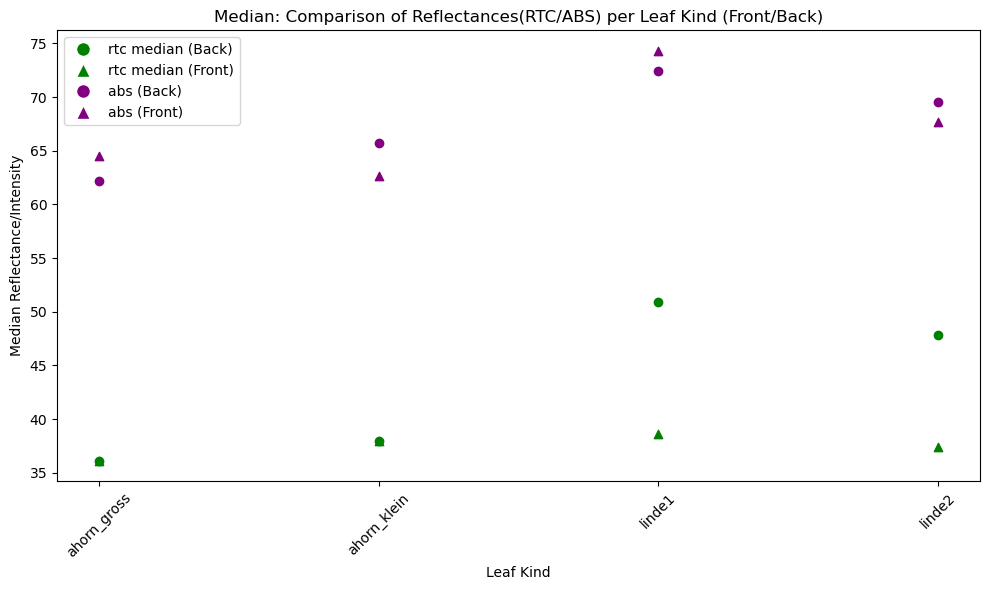

In [124]:
# Plot with x = leaf kind, y1 = median reflectances (back and front)
# Color: rtc (green) or abs (purple); Shape: o=back, ^=front

fig, ax = plt.subplots(figsize=(10, 6))

x = merged['leaf_kind']

color_abs = 'purple'
color_rtc = 'green'

# Plot absolute reflectance (back and front) - median
ax.scatter(x, merged['back_refl_rtc_median'], marker='o', color=color_rtc, label='Back rtc median')
ax.scatter(x, merged['front_median_intensity_corr'], marker='^', color=color_rtc, label='Front rtc median')
ax.scatter(x, merged['back_refl_abs'], marker='o', color=color_abs, label='Back abs median')
ax.scatter(x, merged['front_abs_refl'], marker='^', color=color_abs, label='Front abs median')

ax.set_xlabel('Leaf Kind')
ax.set_ylabel('Median Reflectance/Intensity')
ax.set_title('Median: Comparison of Reflectances(RTC/ABS) per Leaf Kind (Front/Back)')
# Custom legend to clarify color/shape mapping
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=color_rtc, label='rtc median (Back)', markersize=10),
    Line2D([0], [0], marker='^', color='w', markerfacecolor=color_rtc, label='rtc median (Front)', markersize=10),
    Line2D([0], [0], marker='o', color='w', markerfacecolor=color_abs, label='abs (Back)', markersize=10),
    Line2D([0], [0], marker='^', color='w', markerfacecolor=color_abs, label='abs (Front)', markersize=10),
]
ax.legend(handles=legend_elements, loc='best')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


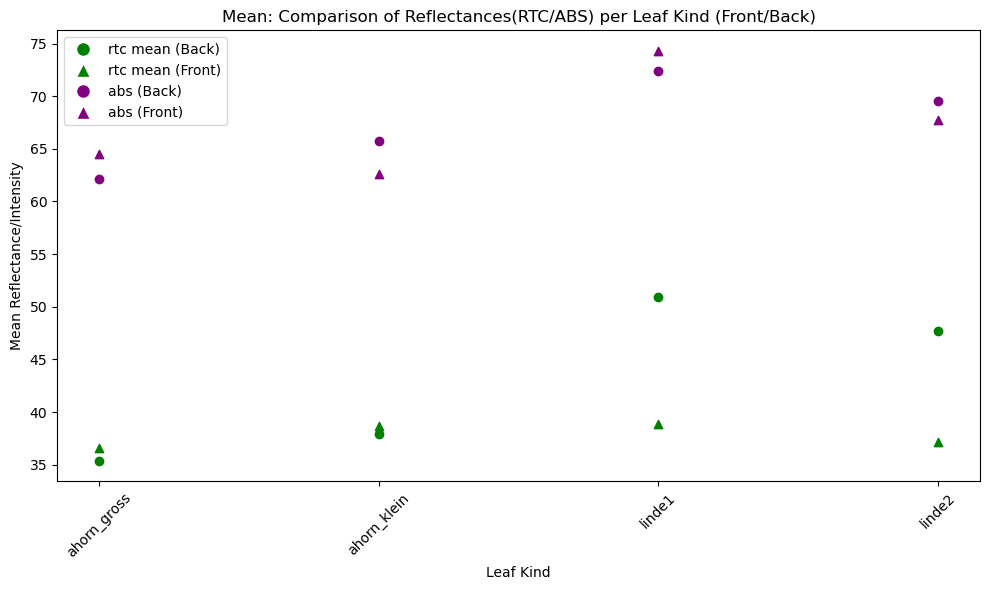

In [126]:
# Plot with x = leaf kind, y1 = mean reflectances (back and front)
# Color: rtc (green) or abs (purple); Shape: o=back, ^=front

fig, ax = plt.subplots(figsize=(10, 6))

x = merged['leaf_kind']

color_abs = 'purple'
color_rtc = 'green'

# Plot absolute reflectance (back and front) - mean
ax.scatter(x, merged['back_refl_rtc_mean'], marker='o', color=color_rtc, label='Back rtc mean')
ax.scatter(x, merged['front_mean_intensity_corr'], marker='^', color=color_rtc, label='Front rtc mean')
ax.scatter(x, merged['back_refl_abs'], marker='o', color=color_abs, label='Back abs median')
ax.scatter(x, merged['front_abs_refl'], marker='^', color=color_abs, label='Front abs median')

ax.set_xlabel('Leaf Kind')
ax.set_ylabel('Mean Reflectance/Intensity')
ax.set_title('Mean: Comparison of Reflectances(RTC/ABS) per Leaf Kind (Front/Back)')
# Custom legend to clarify color/shape mapping
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=color_rtc, label='rtc mean (Back)', markersize=10),
    Line2D([0], [0], marker='^', color='w', markerfacecolor=color_rtc, label='rtc mean (Front)', markersize=10),
    Line2D([0], [0], marker='o', color='w', markerfacecolor=color_abs, label='abs (Back)', markersize=10),
    Line2D([0], [0], marker='^', color='w', markerfacecolor=color_abs, label='abs (Front)', markersize=10),
]
ax.legend(handles=legend_elements, loc='best')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
